## Estimating the Max Sharpe Ratio Portfolio

In [36]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import risk_toolkit as rk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
ind = rk.get_ind_returns()

exp_return = rk.annualized_returns(ind['1996':'2000'], 12)

cov_matrix = ind['1996':'2000'].cov()

(0.0, 0.14178366251002647)

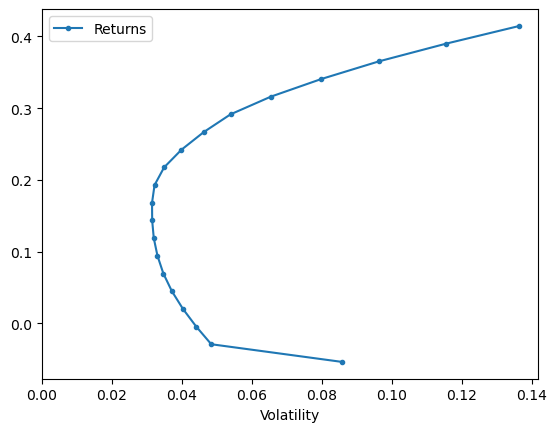

In [38]:
ax = rk.efficient_frontier_multi_asset(20, exp_return, cov_matrix)

ax.set_xlim(left=0)

In [39]:
risk_free_rate = 0.1

weights_msr = rk.max_sharpe_ratio(risk_free_rate, exp_return, cov_matrix)

ret_msr = rk.portfolio_return(weights_msr, exp_return)

vol_msr = rk.portfolio_vol(weights_msr, cov_matrix)

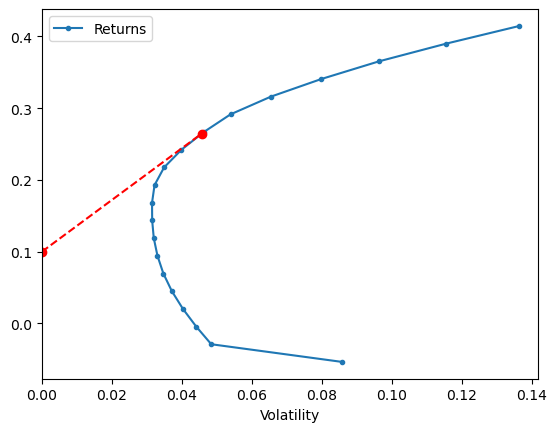

In [40]:
ax = rk.efficient_frontier_multi_asset(20, exp_return, cov_matrix)

ax.set_xlim(left=0)

# Add the Capital Market Line

cml_x = [0, vol_msr]  # Both ends of the line in axis X

cml_y = [risk_free_rate, ret_msr]

ax.plot(cml_x, cml_y, color='red', marker='o', linestyle='dashed')

### Let's try everything together

<AxesSubplot:xlabel='Volatility'>

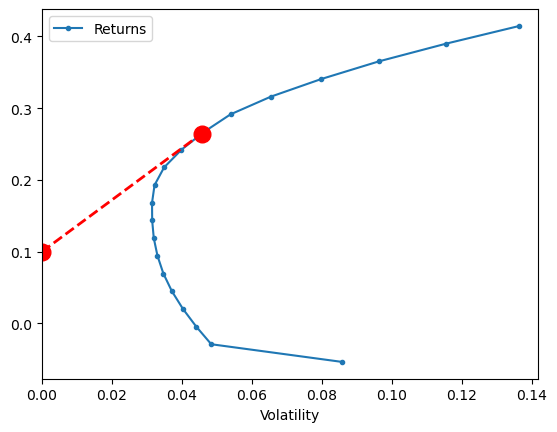

In [55]:
rk.efficient_frontier_multi_asset(20, exp_return, cov_matrix, show_cml=True, risk_free_rate=0.1)